In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#'/content/drive/MyDrive/machine learning/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os.path import isdir, join
from pathlib import Path
import numpy as np
import pandas as pd
import random as rn
import os

from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
import os

train_path = '/content/drive/MyDrive/machine learning/data/train/'
file_count = len([name for name in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, name))])

print(f"Number of files in '{train_path}': {file_count}")


Number of files in '/content/drive/MyDrive/machine learning/data/train/': 2641


In [ ]:
import os

train_path = '/content/drive/MyDrive/machine learning/data/voice/'
file_count = len([name for name in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, name))])

print(f"Number of files in '{train_path}': {file_count}")


Number of files in '/content/drive/MyDrive/machine learning/data/voice/': 1601


In [ ]:
import os

train_path = '/content/drive/MyDrive/machine learning/data/normal/'
file_count = len([name for name in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, name))])

print(f"Number of files in '{train_path}': {file_count}")


Number of files in '/content/drive/MyDrive/machine learning/data/normal/': 1040


## 1. Dataload

### 1. dataframe convert

In [ ]:
INPUT_DIR = '/content/drive/MyDrive/machine learning/data/voice'
OUTPUT_DIR = '/content/drive/MyDrive/machine learning'

wav_files = os.listdir(INPUT_DIR)

voice_df = pd.DataFrame({'file_name': wav_files,'label': [1] * len(wav_files)})

print(voice_df)

                       file_name  label
0     0005_G1A3E7_KYG_000891.wav      1
1     0005_G1A3E7_KYG_000906.wav      1
2     0005_G1A3E7_KYG_000888.wav      1
3     0005_G1A3E7_KYG_000860.wav      1
4     0005_G1A3E7_KYG_000868.wav      1
...                          ...    ...
1596  0005_G1A3E7_KYG_000889.wav      1
1597  0005_G1A3E7_KYG_000859.wav      1
1598  0005_G1A3E7_KYG_000855.wav      1
1599  0005_G1A3E7_KYG_000857.wav      1
1600  0005_G1A3E7_KYG_000884.wav      1

[1601 rows x 2 columns]


In [ ]:
INPUT_DIR = '/content/drive/MyDrive/machine learning/data/normal'
OUTPUT_DIR = '/content/drive/MyDrive/machine learning'

wav_files = os.listdir(INPUT_DIR)

normal_df = pd.DataFrame({'file_name': wav_files, 'label': [0] * len(wav_files)})

print(normal_df)

                                              file_name  label
0     일반남여_일반통합06_F_1536505292_35_경...      0
1     일반남여_일반통합06_F_1536505292_35_경...      0
2     일반남여_일반통합06_F_1536505292_35_경...      0
3     일반남여_일반통합06_F_1536505292_35_경...      0
4     일반남여_일반통합06_F_1536505292_35_경...      0
...                                                 ...    ...
1035  일반남여_일반통합06_F_1536505292_35_경...      0
1036  일반남여_일반통합06_F_1536505292_35_경...      0
1037  일반남여_일반통합06_F_1536505292_35_경...      0
1038  일반남여_일반통합06_F_1536505292_35_경...      0
1039  일반남여_일반통합06_F_1536505292_35_경...      0

[1040 rows x 2 columns]


In [ ]:
train = pd.concat([voice_df, normal_df], ignore_index=True)
print(train)

                                              file_name  label
0                            0005_G1A3E7_KYG_000891.wav      1
1                            0005_G1A3E7_KYG_000906.wav      1
2                            0005_G1A3E7_KYG_000888.wav      1
3                            0005_G1A3E7_KYG_000860.wav      1
4                            0005_G1A3E7_KYG_000868.wav      1
...                                                 ...    ...
2636  일반남여_일반통합06_F_1536505292_35_경...      0
2637  일반남여_일반통합06_F_1536505292_35_경...      0
2638  일반남여_일반통합06_F_1536505292_35_경...      0
2639  일반남여_일반통합06_F_1536505292_35_경...      0
2640  일반남여_일반통합06_F_1536505292_35_경...      0

[2641 rows x 2 columns]


- Waveform graph

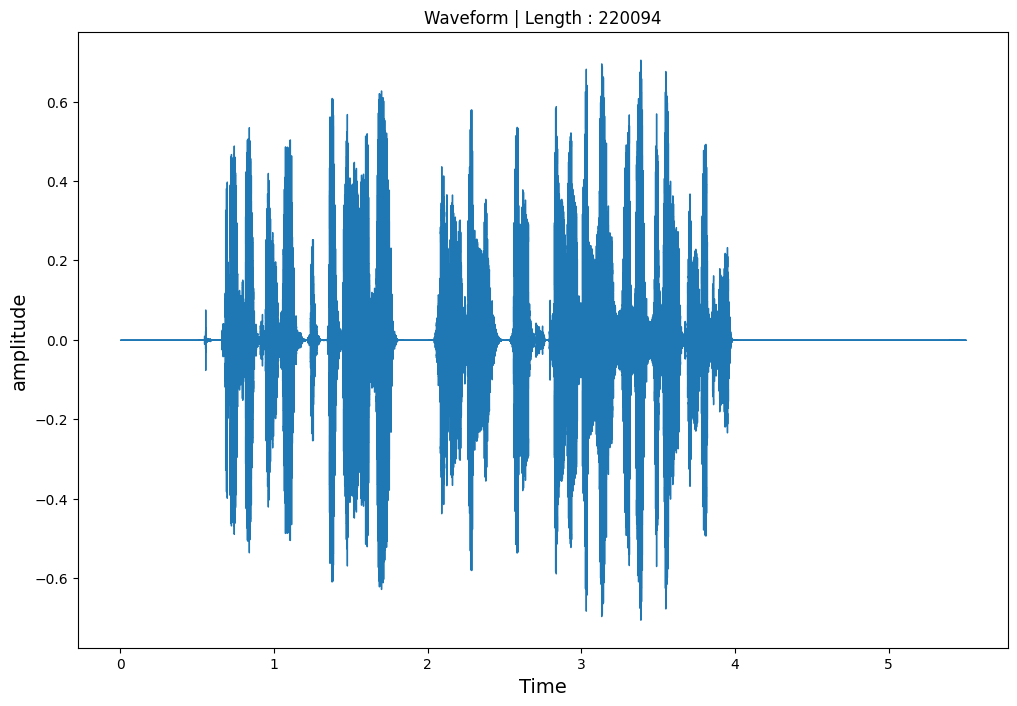

In [ ]:
normal_filename = '/content/drive/MyDrive/machine learning/data/normal/일반남여_일반통합05_M_1527404971_51_충청_실내_09241.wav'
# sample_rate, samples = wavfile.read(a_filename)
samples, sample_rate = librosa.load(normal_filename)

plt.figure(figsize=(12, 8))
plt.xlabel('time', fontsize = 14)
plt.ylabel('amplitude', fontsize = 14)
plt.title('Waveform | Length : ' + str(len(samples)))
# plt.plot(np.linspace(0, sample_rate/len(samples), len(samples)), samples)
librosa.display.waveshow(samples, sr=40000)
plt.show()

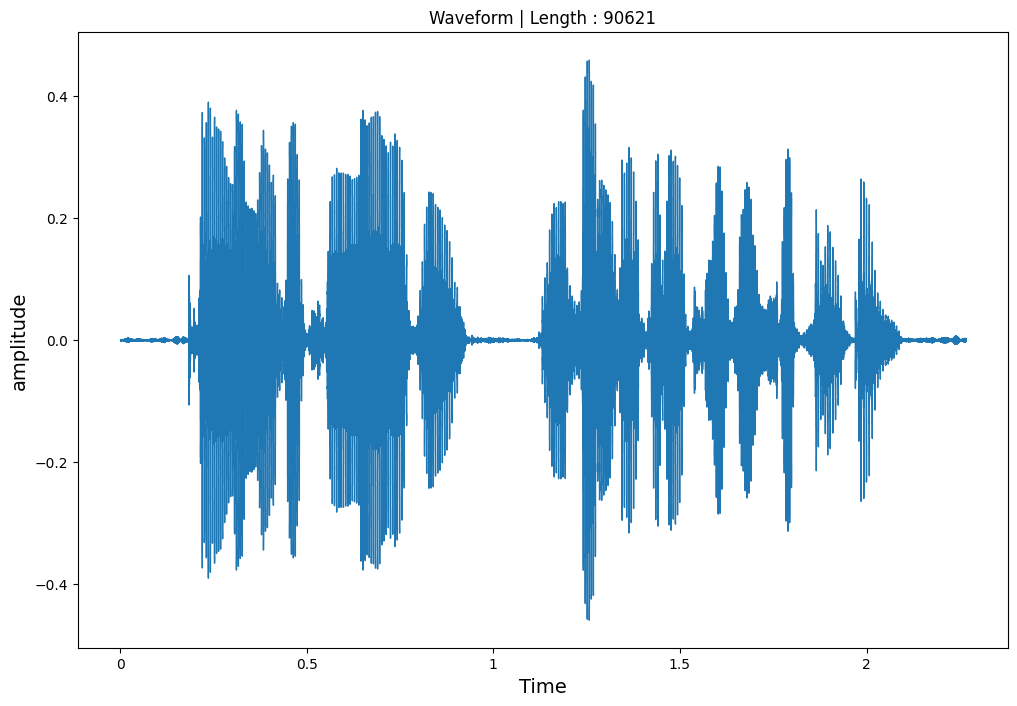

In [ ]:
voice_filename = '/content/drive/MyDrive/machine learning/data/voice/0005_G1A3E7_KYG_000891.wav'
# sample_rate, samples = wavfile.read(a_filename)
samples, sample_rate = librosa.load(voice_filename)

plt.figure(figsize=(12, 8))
plt.xlabel('time', fontsize = 14)
plt.ylabel('amplitude', fontsize = 14)
plt.title('Waveform | Length : ' + str(len(samples)))
# plt.plot(np.linspace(0, sample_rate/len(samples), len(samples)), samples)
librosa.display.waveshow(samples, sr=40000)
plt.show()

- 푸리에 변환

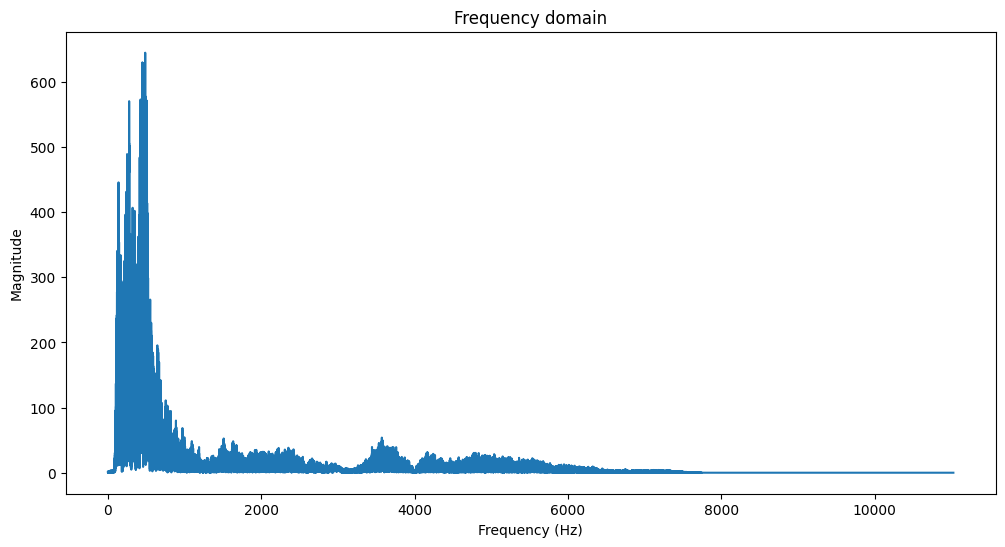

In [ ]:
normal_filename = '/content/drive/MyDrive/machine learning/data/normal/일반남여_일반통합05_M_1527404971_51_충청_실내_09241.wav'
samples, sample_rate = librosa.load(normal_filename)

# 푸리에 변환
fft_spectrum = np.fft.fft(samples)
magnitude = np.abs(fft_spectrum)  # 진폭 스펙트럼
frequency = np.linspace(0, sample_rate, len(magnitude))  # 주파수 범위

# 주파수 스펙트럼의 절반만 사용 (심미적 이유)
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_frequency = frequency[:int(len(frequency)/2)]

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency domain")
plt.show()


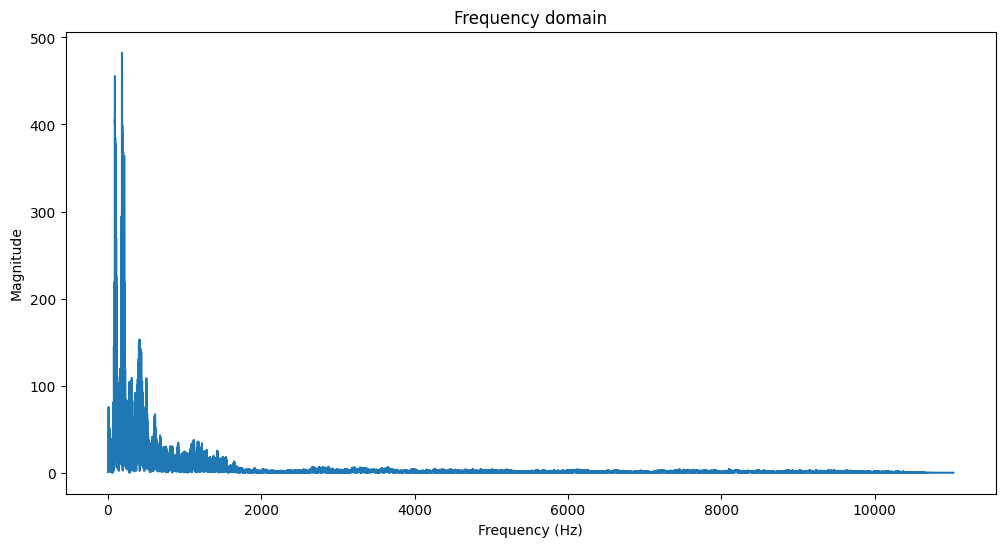

In [ ]:
voice_filename = '/content/drive/MyDrive/machine learning/data/voice/0005_G1A3E7_KYG_000891.wav'
samples, sample_rate = librosa.load(voice_filename)

# 푸리에 변환
fft_spectrum = np.fft.fft(samples)
magnitude = np.abs(fft_spectrum)  # 진폭 스펙트럼
frequency = np.linspace(0, sample_rate, len(magnitude))  # 주파수 범위

# 주파수 스펙트럼의 절반만 사용 (심미적 이유)
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_frequency = frequency[:int(len(frequency)/2)]

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency domain")
plt.show()


- STFT

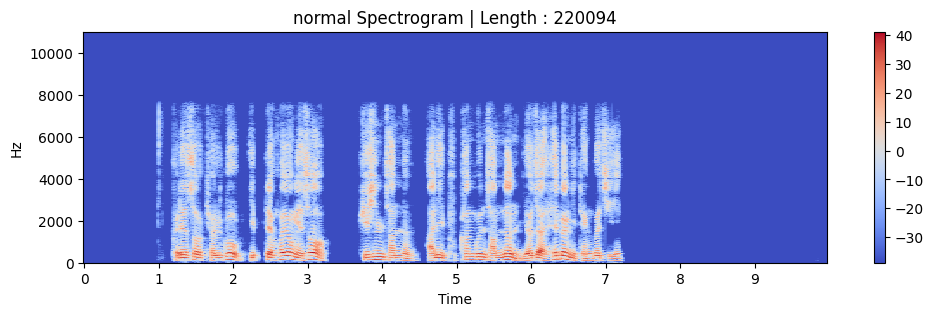

In [ ]:
samples, sample_rate = librosa.load(normal_filename)
X = librosa.stft(samples)  # data -> short term FT
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(12, 3))
plt.title('normal Spectrogram | Length : ' + str(len(samples)))
librosa.display.specshow(Xdb, sr = sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

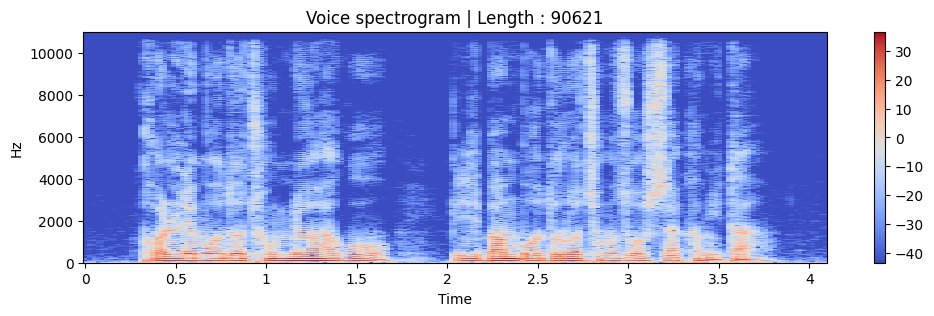

In [ ]:
samples, sample_rate = librosa.load(voice_filename)
X = librosa.stft(samples)  # data -> short term FT
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(12, 3))
plt.title('Voice spectrogram | Length : ' + str(len(samples)))
librosa.display.specshow(Xdb, sr = sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

- MFCC

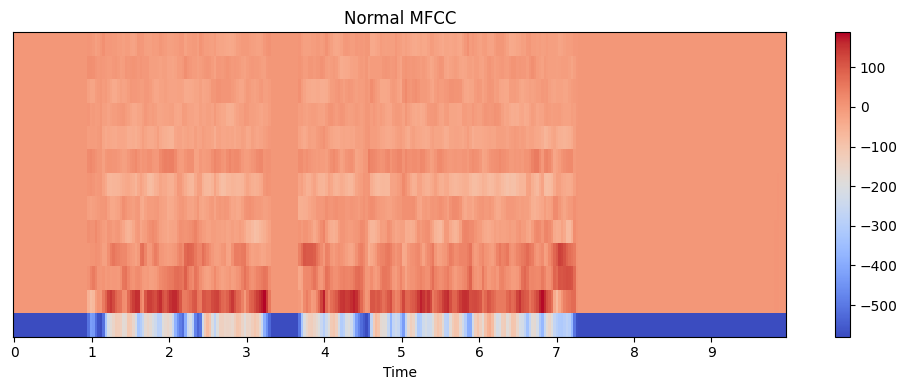

In [ ]:

samples, sample_rate = librosa.load(normal_filename, sr=None)

# Compute the MFCCs
mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=13)  # You can change n_mfcc depending on how many coefficients you want to extract

# Visualize the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate)
plt.colorbar()
plt.title('Normal MFCC')
plt.tight_layout()
plt.show()


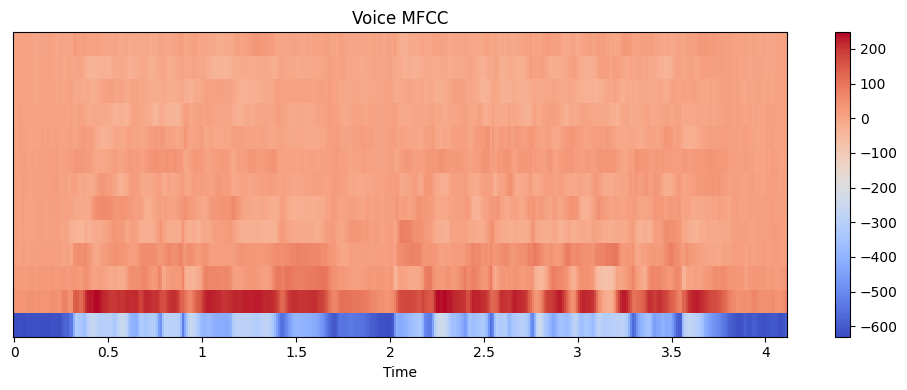

In [ ]:

samples, sample_rate = librosa.load(voice_filename, sr=None)

# Compute the MFCCs
mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=13)  # You can change n_mfcc depending on how many coefficients you want to extract

# Visualize the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate)
plt.colorbar()
plt.title('Voice MFCC')
plt.tight_layout()
plt.show()


- Mel Spectogram

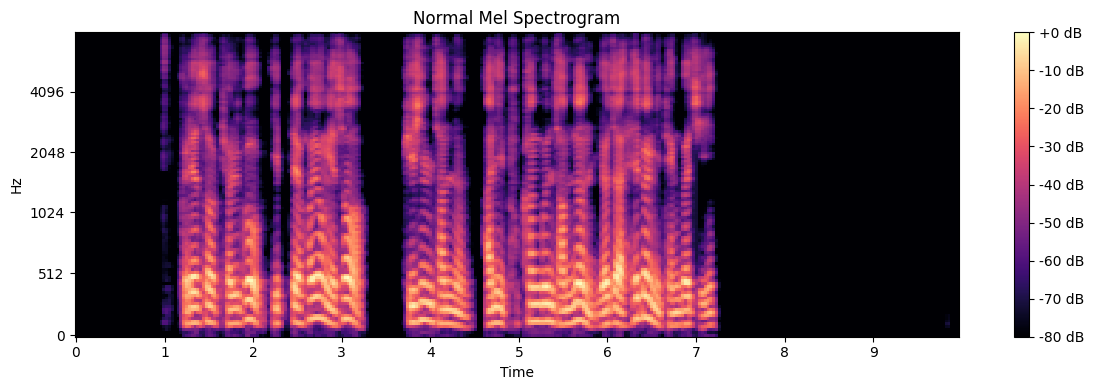

In [ ]:

# Load the audio file
samples, sample_rate = librosa.load(normal_filename, sr=None)

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128)

# Convert to log scale (dB)
log_S = librosa.power_to_db(S, ref=np.max)

# Plotting the Mel Spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Normal Mel Spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()


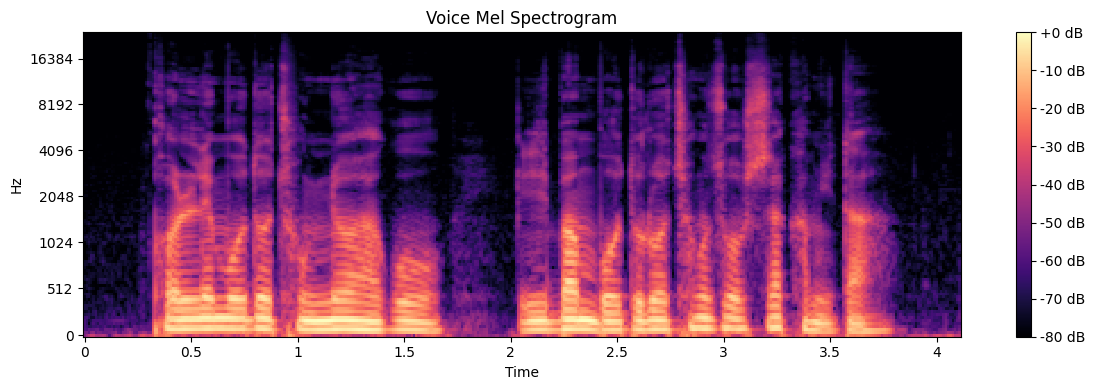

In [ ]:

# Load the audio file
samples, sample_rate = librosa.load(voice_filename, sr=None)

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128)

# Convert to log scale (dB)
log_S = librosa.power_to_db(S, ref=np.max)

# Plotting the Mel Spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Voice Mel Spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()


- Chroma Frequencies


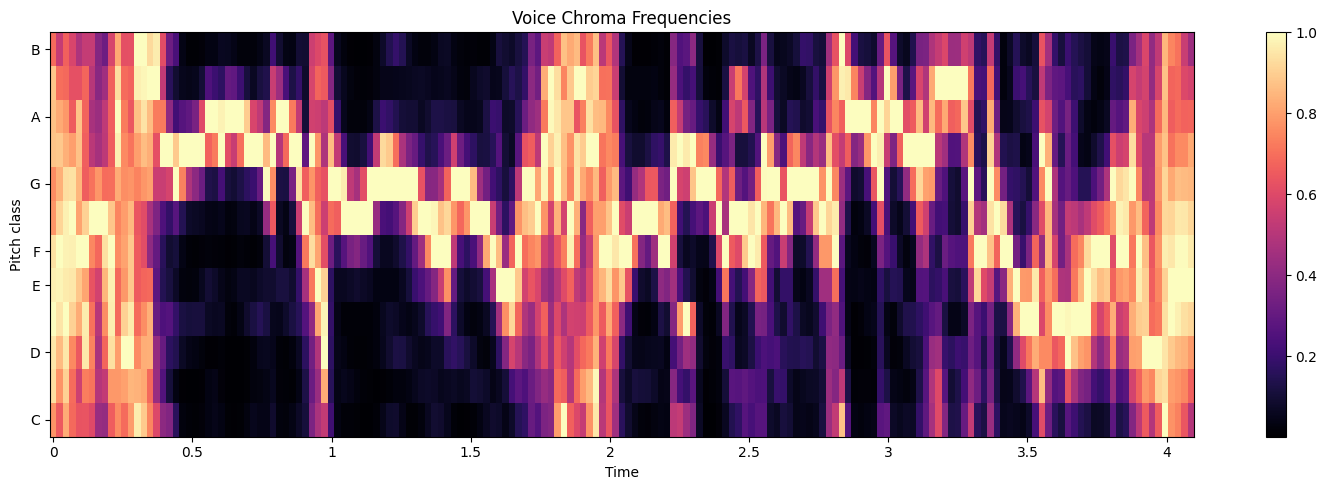

In [ ]:
y, sr = librosa.load(voice_filename)

# Calculate the Chroma frequencies
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot the Chroma frequencies
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Voice Chroma Frequencies')
plt.tight_layout()
plt.show()

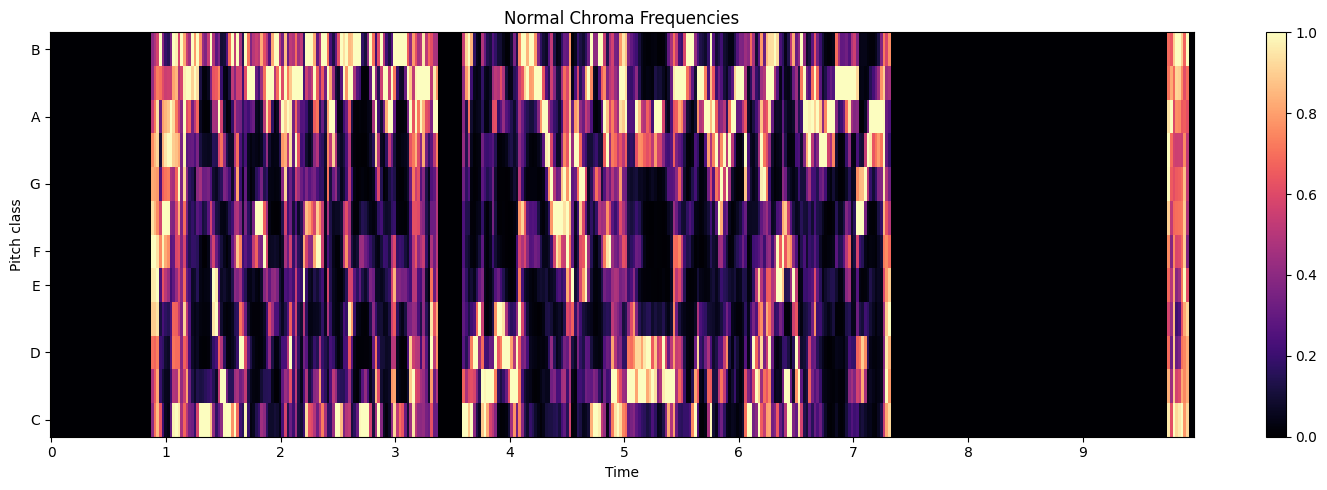

In [ ]:
y, sr = librosa.load(normal_filename)

# Calculate the Chroma frequencies
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot the Chroma frequencies
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Normal Chroma Frequencies')
plt.tight_layout()
plt.show()

- 📝 train.csv에는 train 폴더의 음성 파일 이름과 라벨 컬럼이 포함되어 있습니다. label 컬럼은 0,1 정수로 구성됩니다.



In [ ]:
train.head()

,file_name,label
0,0005_G1A3E7_KYG_000891.wav,1
1,0005_G1A3E7_KYG_000906.wav,1
2,0005_G1A3E7_KYG_000888.wav,1
3,0005_G1A3E7_KYG_000860.wav,1
4,0005_G1A3E7_KYG_000868.wav,1


In [ ]:
print(train['label'].unique())

[1 0]


In [ ]:
samples = np.array(samples, dtype='float64')

resampled_samples = librosa.resample(samples, orig_sr=sample_rate, target_sr=20000)

ipd.Audio(resampled_samples, rate=20000)

In [ ]:
import os

train_path = '/content/drive/MyDrive/machine learning/data/train/'
file_count = len([name for name in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, name))])

print(f"Number of files in '{train_path}': {file_count}")


In [ ]:
all_shape = []
for f in file_name:
  data, sample_rate = librosa.load(train_path + f, sr = 20000)
  all_shape.append(data.shape)

In [ ]:
print(all_shape[:5])
print("Max :", np.max(all_shape, axis = 0))
print("Min :", np.min(all_shape, axis = 0))

### 2. Data augmentation

In [ ]:
# noise 추가
def noise(sample):
    noise_amp = 0.01*np.random.uniform()*np.amax(sample)
    sample = sample + noise_amp*np.random.normal(size = sample.shape[0])
    return sample

# time stretching
def stretch(sample, rate = 0.8):
    stretch_sample = librosa.effects.time_stretch(sample, rate)
    return stretch_sample

# pitch 변환
def pitch(sample, sampling_rate, pitch_factor = 0.8):
    pitch_sample = librosa.effects.pitch_shift(sample, sampling_rate, pitch_factor)
    return pitch_sample

### 3. Feature Extraction
📝 모델링에 사용하면 도움이 될만한 몇가지 feature extraction 방법을 소개하겠습니다.
1. Zero Crossing Rate (ZCR)
↪ 특정 프레임이 지속 기간 동안의 신호의 부호(sign) 변화율 i.e. 신호의 부호가 바뀌는 비율

2. Chroma_shift
↪ Waveform 또는 power spectrogram으로 생성한 chromagram.

3. Mel spectrum
↪ 오디오 신호(time domain)에 Fast Fourier Transform (FFT) -> Spectrum (frequency domain)
↪ Spectrum + 필터링 (Mel filter bank) -> Mel spectrum

4. MFCC (Mel-Frequency Cepstral Coefficient)
↪ Mel spectrum에서 Cepstral 분석을 통해 고유한 특성을 추출함

5. RMS (Root Mean Square)
↪ 오디오 평균 음량 측정



In [ ]:
import numpy as np
import librosa

def ZCR_features(sample, sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=sample).T, axis=0)
    result = np.hstack((result, zcr))

    return result

def Chroma_stft_features(sample, sample_rate):
    result = np.array([])
    # Chroma_stft
    stft = np.abs(librosa.stft(sample))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))



    return result

def MelSpectrogram_features(sample, sample_rate):
    result = np.array([])
    # MelSpectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=sample, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))


    return result


def MFCC_features(sample, sample_rate):
    result = np.array([])
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=sample, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    return result

def RMS_features(sample, sample_rate):
    result = np.array([])
    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=sample).T, axis=0)
    result = np.hstack((result, rms))

    return result


# 예제 오디오 샘플 로드
a_filename = '/content/drive/MyDrive/machine learning/data/voice/0005_G1A3E7_KYG_000928.wav'  # 오디오 파일 경로를 정확히 지정해야 합니다.
samples, sample_rate = librosa.load(a_filename)

# 특성 추출
ZCR_features = ZCR_features(samples, sample_rate)
Chroma_stft_features = Chroma_stft_features(samples, sample_rate)
MelSpectrogram_features = MelSpectrogram_features(samples, sample_rate)
MFCC_features = MFCC_features(samples, sample_rate)
RMS_features = RMS_features(samples, sample_rate)


print("Zerop Crossiong Rate:\n",ZCR_features)
print("Chroma_shift:\n",Chroma_stft_features)
print("Mel spectrum:\n", MelSpectrogram_features)
print("MFCC:\n ",MFCC_features)
print("MFCC:\n ",RMS_features)


In [ ]:
def get_features(path):
    sample, sample_rate = librosa.load(path)

    # without augmentation
    res1 = extract_features(sample, sample_rate)
    result = np.array(res1)

    # sample with noise
    noise_sample = noise(sample)
    res2 = extract_features(noise_sample, sample_rate)
    result = np.vstack((result, res2))

    # sample with stretching and pitching
    str_sample = stretch(sample)
    sample_stretch_pitch = pitch(str_sample, sample_rate)
    res3 = extract_features(sample_stretch_pitch, sample_rate)
    result = np.vstack((result, res3))

    return result


# 2. MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import tensorflow as tf
from tqdm import tqdm
from glob import glob
from google.colab import drive

import librosa
import librosa.display as dsp
import IPython.display as ipd

warnings.filterwarnings(action='ignore')

import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(813)

In [ ]:
import os
import librosa

# Set the paths to your input and output data
INPUT_DIR = '/content/drive/MyDrive/machine learning/data/train'
OUTPUT_DIR = '/content/drive/MyDrive/machine learning'

# Print names of the first 10 WAV files from the input directory
wav_files = [f for f in os.listdir(INPUT_DIR) if f.endswith('.wav')]
for i in range(min(10, len(wav_files))):
    print(wav_files[i])

# For the first three files in another directory
for i in os.listdir('/content/drive/MyDrive/machine learning/data/train')[:10]:
    file_path = f'/content/drive/MyDrive/machine learning/data/train/{i}'
    print(f'{i}')

    # Load the audio file with librosa
    data, sample_rate = librosa.load(file_path, sr=None)
    print('Sample rate:', sample_rate, ', Audio shape:', data.shape)
    print('Length:', data.shape[0] / float(sample_rate), 'secs')
    print('\n')


0005_G1A3E7_KYG_000983.wav
0005_G1A3E7_KYG_000977.wav
0005_G1A3E7_KYG_000959.wav
0005_G1A3E7_KYG_000970.wav
0005_G1A3E7_KYG_000973.wav
0005_G1A3E7_KYG_000976.wav
0005_G1A3E7_KYG_000964.wav
0005_G1A3E7_KYG_000985.wav
0005_G1A3E7_KYG_000989.wav
0005_G1A3E7_KYG_000975.wav
0005_G1A3E7_KYG_000983.wav
Sample rate: 48000 , Audio shape: (114949,)
Length: 2.3947708333333333 secs


0005_G1A3E7_KYG_000977.wav
Sample rate: 48000 , Audio shape: (117728,)
Length: 2.4526666666666666 secs


0005_G1A3E7_KYG_000959.wav
Sample rate: 48000 , Audio shape: (138974,)
Length: 2.8952916666666666 secs


0005_G1A3E7_KYG_000970.wav
Sample rate: 48000 , Audio shape: (139479,)
Length: 2.9058125 secs


0005_G1A3E7_KYG_000973.wav
Sample rate: 48000 , Audio shape: (124124,)
Length: 2.585916666666667 secs


0005_G1A3E7_KYG_000976.wav
Sample rate: 48000 , Audio shape: (138707,)
Length: 2.8897291666666667 secs


0005_G1A3E7_KYG_000964.wav
Sample rate: 48000 , Audio shape: (154799,)
Length: 3.2249791666666665 secs


0005_

In [ ]:
import os
from tqdm.notebook import tqdm
import librosa
import numpy as np
import pandas as pd

# Set the sample rate
sr = 22050

# Assuming 'train' DataFrame has a column 'filename' with WAV file names and 'label'
train_file_names = train["file_name"].to_numpy()
target = train["label"].to_numpy()

# Define your directory
INPUT_DIR = '/content/drive/MyDrive/machine learning/data/train/'

# Create a list of files in the directory, excluding directories
file_list = [f for f in os.listdir(INPUT_DIR) if os.path.isfile(os.path.join(INPUT_DIR, f))]

# Update the train_file_names to include only the files that are in file_list
train_file_names = [f for f in train_file_names if f in file_list]

# Function to load audio data
def load_audio(filenames, target, path):
    audios = []
    for audio in tqdm(filenames):
        try:
            # Load audio file using librosa
            an_audio, _ = librosa.load(os.path.join(path, audio), sr=sr)
            audio_array = np.array(an_audio)
            audios.append(audio_array)
        except Exception as e:
            print(f"Error loading {audio}: {e}")
            continue
    audios = np.array(audios, dtype=object)

    targets = target.copy()

    return audios, targets

# Load audio data
audio_train, target_train = load_audio(train_file_names, target, path=INPUT_DIR)

# Uncomment the next line if you also have test data
# audio_test, _ = load_audio(test_file_names, np.array([None]), path=


  0%|          | 0/2641 [00:00<?, ?it/s]

In [ ]:
def random_pad(mels, pad_size, mfcc=True):
    current_size = mels.shape[1]
    if current_size < pad_size:
        pad_width = pad_size - current_size
        rand = np.random.rand()
        left = int(pad_width * rand)
        right = pad_width - left

        mels = np.pad(mels, pad_width=((0, 0), (left, right)), mode='constant')
    elif current_size > pad_size:
        start = np.random.randint(0, current_size - pad_size)
        mels = mels[:, start:start + pad_size]

    return mels


In [ ]:
def build_vggnet(input_shape):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model


In [ ]:
def build_bilstm(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
# VGGNet 모델 요약
vggnet_model = build_vggnet((50, 50, 1))  # 임의의 입력 형태 설정
vggnet_model.summary()

In [ ]:
# BiLSTM 모델 요약
bilstm_model = build_bilstm((50, 50))  # 임의의 입력 형태 설정
bilstm_model.summary()

In [ ]:
size = 50
pad_size = 50
repeat_size = 5

In [ ]:
audio_mels = []
audio_mfcc = []

for y in audio_train:
    # Corrected the function call by using the 'y' keyword argument
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=size)
    mels = librosa.power_to_db(mels, ref=np.max)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=size)

    for i in range(repeat_size):
        audio_mels.append(random_pad(mels, pad_size=pad_size, mfcc=False))
        audio_mfcc.append(random_pad(mfcc, pad_size=pad_size, mfcc=True))


In [ ]:
audio_mels_array = np.array(audio_mels)[..., np.newaxis]
audio_mfcc_array = np.array(audio_mfcc)[..., np.newaxis]

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14,14))

# Mel spectrogram
ax = plt.subplot(2, 1, 1)
S = librosa.feature.melspectrogram(y=audio_train[15], sr=sr, n_mels=40)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel spectrogram')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')

# MFCC
ax = plt.subplot(2, 1, 2)
mfcc = librosa.feature.mfcc(y=audio_train[15], sr=sr, n_mfcc=20)  # Changed n_mels to n_mfcc
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.title('MFCC')
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
target_num = 0
target_num_idx = np.where(target_train == target_num)[0]

if len(target_num_idx) == 0:
    print(f"No samples found for target number {target_num}.")
else:
    target_num_idx = np.random.choice(target_num_idx, min(16, len(target_num_idx)))

    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(target_num_idx):
        ax = plt.subplot(4, 4, i + 1)
        if i < 8:
            plt.imshow(audio_mels_array[idx], aspect='auto')
        else:
            plt.imshow(audio_mfcc_array[idx], aspect='auto')


In [ ]:
target_num = 1
target_num_idx = np.where(target_train == target_num)[0]

if len(target_num_idx) == 0:
    print(f"No samples found for target number {target_num}.")
else:
    target_num_idx = np.random.choice(target_num_idx, min(16, len(target_num_idx)))

    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(target_num_idx):
        ax = plt.subplot(4, 4, i + 1)
        if i < 8:
            plt.imshow(audio_mels_array[idx], aspect='auto')
        else:
            plt.imshow(audio_mfcc_array[idx], aspect='auto')


In [ ]:
from sklearn.model_selection import train_test_split

repeated_target = np.repeat(target_train,repeat_size)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, LSTM, Bidirectional, GlobalAveragePooling2D, ReLU, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# audio_mels_array와 target 배열의 길이를 동일하게 조정
min_length = min(len(audio_mels_array), len(target))
audio_mels_array = audio_mels_array[:min_length]
target = target[:min_length]

# K-fold cross-validation
skf = StratifiedKFold(n_splits=3)
acc_list = []

for fold, (train_index, val_index) in enumerate(skf.split(audio_mels_array, target)):
    print(f'\n********** Fold {fold+1} **********')

    # Splitting the data
    x_train_mels, x_val_mels = audio_mels_array[train_index], audio_mels_array[val_index]
    x_train_mfcc, x_val_mfcc = audio_mfcc_array[train_index], audio_mfcc_array[val_index]
    y_train, y_val = target[train_index], target[val_index]

    # Building and training VGGNet model
    vggnet_model = build_vggnet(x_train_mels.shape[1:])
    vggnet_filepath = f"vggnet_fold_{fold}.hdf5"
    vggnet_checkpoint = ModelCheckpoint(vggnet_filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
    vggnet_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    vggnet_model.fit(x_train_mels, y_train, epochs=50, batch_size=32, validation_data=(x_val_mels, y_val), callbacks=[vggnet_checkpoint], verbose=0)

    # Reshape MFCC for BiLSTM
    x_train_mfcc_reshaped = x_train_mfcc.reshape(x_train_mfcc.shape[0], x_train_mfcc.shape[1], -1)
    x_val_mfcc_reshaped = x_val_mfcc.reshape(x_val_mfcc.shape[0], x_val_mfcc.shape[1], -1)

    # Building and training BiLSTM model
    bilstm_model = build_bilstm(x_train_mfcc_reshaped.shape[1:])
    bilstm_filepath = f"bilstm_fold_{fold}.hdf5"
    bilstm_checkpoint = ModelCheckpoint(bilstm_filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
    bilstm_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    bilstm_model.fit(x_train_mfcc_reshaped, y_train, epochs=50, batch_size=32, validation_data=(x_val_mfcc_reshaped, y_val), callbacks=[bilstm_checkpoint], verbose=0)

    # Ensemble predictions and accuracy
    vggnet_val_pred = vggnet_model.predict(x_val_mels)
    bilstm_val_pred = bilstm_model.predict(x_val_mfcc_reshaped)
    ensemble_val_pred = (vggnet_val_pred + bilstm_val_pred) / 2
    ensemble_val_label = np.argmax(ensemble_val_pred, axis=1)
    ensemble_acc = accuracy_score(y_val, ensemble_val_label)
    acc_list.append(ensemble_acc)
    print(f'VGGNet Model Accuracy: {accuracy_score(y_val, np.argmax(vggnet_val_pred, axis=1)):.4f}')
    print(f'BiLSTM Model Accuracy: {accuracy_score(y_val, np.argmax(bilstm_val_pred, axis=1)):.4f}')
    print(f'Ensemble Accuracy for Fold {fold+1}: {ensemble_acc:.4f}')

# 평균 정확도 출력
print(f'\nAverage Accuracy: {np.mean(acc_list):.4f}')
